In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"Data\train.csv")
add_data = pd.read_csv(r"Data\additional_data.csv")
test_data = pd.read_csv(r"Data\test.csv")

In [3]:
add_data[add_data['Feature 22'].isnull()]

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 18,Feature 19,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,price
26,26,27,0.34,0,0,1,0,0,1,0,...,0,0,0,0,NaN,57.0,4.50,4.44,2.74,803
86,86,87,0.74,0,0,1,0,0,0,1,...,0,0,0,0,NaN,59.0,5.92,5.97,3.52,2501
117,117,118,1.00,0,0,0,1,0,0,0,...,0,0,0,0,NaN,59.0,6.40,6.36,4.00,5292
148,148,149,1.11,0,0,0,1,0,0,1,...,0,0,0,0,NaN,61.0,6.66,6.61,4.09,4177
163,163,164,1.00,0,0,0,0,1,0,0,...,0,1,0,0,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26848,26848,26849,1.22,0,0,0,0,1,0,0,...,1,0,0,0,NaN,59.0,6.91,6.85,4.29,7673
26854,26854,26855,1.29,0,0,0,1,0,0,0,...,0,1,0,0,NaN,58.0,7.12,7.03,4.27,6321
26879,26879,26880,0.51,0,0,0,0,1,0,1,...,0,0,0,0,NaN,58.0,5.10,5.13,3.12,1343
26923,26923,26924,0.51,0,0,1,0,0,1,0,...,0,1,0,0,NaN,57.0,5.12,5.09,3.18,1882


In [4]:
master = pd.concat([train_data,add_data])

In [5]:
master = master[~master['Feature 22'].isnull()]

In [6]:
master['price2'] = master['price'] / master['Feature 1']
master['price3'] = master['price'] / master['Feature 1'].apply(lambda x : x*x)
#train_data['price4'] = train_data['price'] / train_data['Feature 1'].apply(lambda x : x*x*x)
#train_data['Feature 1.1'] = train_data['Feature 1'].apply(lambda x : x*x)
master['Feature 26.1'] = master["Feature 26"]/master['Feature 1']
master['Feature 24.1'] = master["Feature  24"]/master['Feature 1']
master['Feature 25.1'] = master["Feature 25"]/master['Feature 1']
#train_data['Feature 26.2'] = train_data["Feature 26"]/train_data['Feature 1'].apply(lambda x : x*x)
#train_data['Feature 24.2'] = train_data["Feature  24"]/train_data['Feature 1'].apply(lambda x : x*x)
#train_data['Feature 25.2'] = train_data["Feature 25"]/train_data['Feature 1'].apply(lambda x : x*x)

test_data['Feature 26.1'] = test_data["Feature 26"]/test_data['Feature 1']
test_data['Feature 24.1'] = test_data["Feature  24"]/test_data['Feature 1']
test_data['Feature 25.1'] = test_data["Feature 25"]/test_data['Feature 1']

In [7]:
master

,Unnamed: 0,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3,Feature 26.1,Feature 24.1,Feature 25.1
0,143728,143728,0.53,0,0,1,0,0,0,1,...,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419,6.056604,9.735849,9.811321
1,52657,52657,0.50,0,1,0,0,0,0,0,...,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000,6.360000,9.780000,10.040000
2,124407,124407,2.03,0,0,1,0,0,0,0,...,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911,2.433498,4.133005,4.083744
3,45535,45535,0.33,0,0,1,0,0,0,1,...,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457,8.272727,13.363636,13.545455
4,178894,178894,0.90,0,1,0,0,0,0,0,...,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901,4.288889,6.711111,6.755556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,26962,26963,1.11,0,0,0,1,0,0,0,...,58.0,6.61,6.52,4.09,5408,4872.072072,4389.254119,3.684685,5.954955,5.873874
26963,26963,26964,0.33,0,0,1,0,0,0,0,...,55.0,4.44,4.42,2.74,1114,3375.757576,10229.568411,8.303030,13.454545,13.393939
26964,26964,26965,0.51,0,0,0,1,0,0,1,...,58.0,5.12,5.15,3.17,1656,3247.058824,6366.782007,6.215686,10.039216,10.098039
26965,26965,26966,0.27,0,0,0,0,1,0,0,...,56.0,4.19,4.20,2.60,682,2525.925926,9355.281207,9.629630,15.518519,15.555556


In [8]:
master = master.drop('Unnamed: 0',axis=1)

<Axes: xlabel='price', ylabel='Count'>

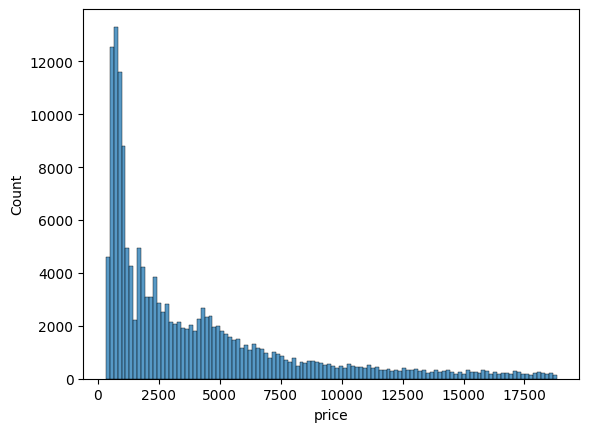

In [9]:
sns.histplot(x='price',data=master)

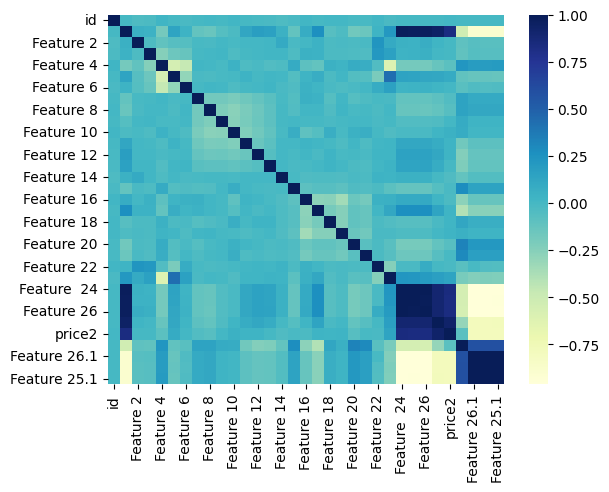

In [10]:
dataplot = sns.heatmap(master.corr(), cmap="YlGnBu")

In [11]:
master.loc[(master['price2'] > 11000)].shape


(342, 33)

In [12]:
master = master.loc[(master['price2'] < 11000)]

<Axes: xlabel='price2', ylabel='Count'>

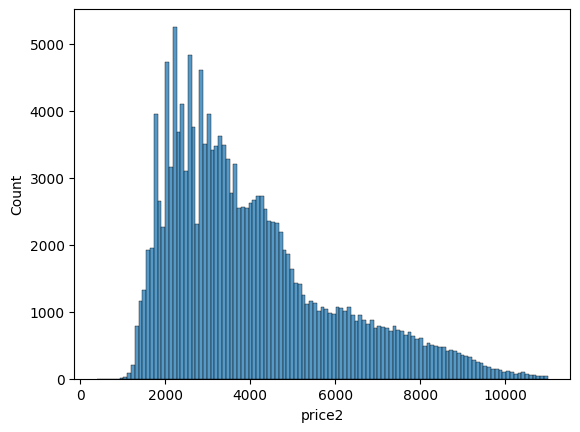

In [13]:
sns.histplot(x='price2',data=master)

<Axes: xlabel='price3', ylabel='Count'>

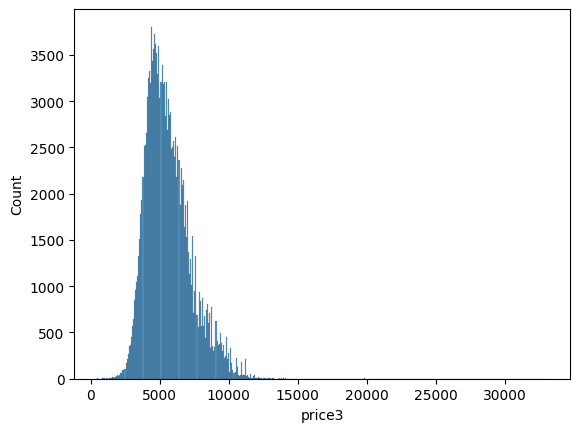

In [14]:
sns.histplot(x='price3',data=master)

In [15]:
master.loc[master['price3'] > 15000 ].count()

id              35
Feature 1       35
Feature 2       35
Feature 3       35
Feature 4       35
Feature 5       35
Feature 6       35
Feature 7       35
Feature 8       35
Feature 9       35
Feature 10      35
Feature 11      35
Feature 12      35
Feature 13      35
Feature 14      35
Feature 15      35
Feature 16      35
Feature 17      35
Feature 18      35
Feature 19      35
Feature 20      35
Feature 21      35
Feature 22      35
Feature 23      35
Feature  24     35
Feature 25      35
Feature 26      35
price           35
price2          35
price3          35
Feature 26.1    35
Feature 24.1    35
Feature 25.1    35
dtype: int64

In [16]:
master.loc[(master['price3'] > 12000) | (master['price3'] < 1750) ].shape

(284, 33)

In [17]:
master = master.loc[(master['price3'] < 12000) & (master['price3'] > 1750)]

<Axes: xlabel='price3', ylabel='Count'>

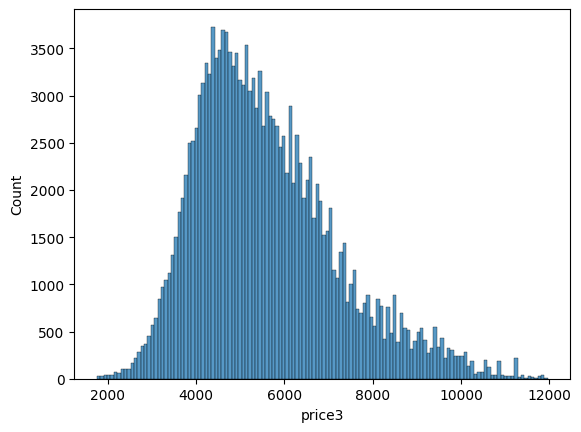

In [18]:
sns.histplot(x='price3',data=master)

In [50]:
master.to_csv('./Data/master3.csv',index=False)

In [51]:
master

,id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 23,Feature 24,Feature 25,Feature 26,price,price2,price3,Feature 26.1,Feature 24.1,Feature 25.1
0,143728,0.53,0,0,1,0,0,0,1,0,...,56.0,5.16,5.20,3.21,1656,3124.528302,5895.336419,6.056604,9.735849,9.811321
1,52657,0.50,0,1,0,0,0,0,0,0,...,56.0,4.89,5.02,3.18,1063,2126.000000,4252.000000,6.360000,9.780000,10.040000
2,124407,2.03,0,0,1,0,0,0,0,0,...,60.0,8.39,8.29,4.94,18508,9117.241379,4491.251911,2.433498,4.133005,4.083744
3,45535,0.33,0,0,1,0,0,0,1,0,...,55.0,4.41,4.47,2.73,723,2190.909091,6639.118457,8.272727,13.363636,13.545455
4,178894,0.90,0,1,0,0,0,0,0,0,...,59.0,6.04,6.08,3.86,3187,3541.111111,3934.567901,4.288889,6.711111,6.755556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,0,0,0,1,0,0,0,0,...,58.0,6.61,6.52,4.09,5408,4872.072072,4389.254119,3.684685,5.954955,5.873874
26963,26964,0.33,0,0,1,0,0,0,0,0,...,55.0,4.44,4.42,2.74,1114,3375.757576,10229.568411,8.303030,13.454545,13.393939
26964,26965,0.51,0,0,0,1,0,0,1,0,...,58.0,5.12,5.15,3.17,1656,3247.058824,6366.782007,6.215686,10.039216,10.098039
26965,26966,0.27,0,0,0,0,1,0,0,1,...,56.0,4.19,4.20,2.60,682,2525.925926,9355.281207,9.629630,15.518519,15.555556


In [31]:
test_data.to_csv('test_data_final.csv',index=False)